# KNN

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [4]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

In [5]:
df_raw_y=df_raw["diagnosis"]

In [6]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

In [7]:
df_raw_y=df_raw["diagnosis"].replace({"음성": 0, "양성":1})

In [8]:
df_raw_y.value_counts()

0    212
1    108
Name: diagnosis, dtype: int64

## 데이터를 불러오고, 기술통계량과 행열, 결측치를 확인해주었고, 이상치는 데이터 수가 적기에 처리해주지 않았습니다. 또한 음성과 양성은 각각 모델에 적용시켜주기 위해 0과 1로 치환해주고 확인하였습니다.

In [9]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [10]:
v_feature_names=df_raw_x.columns

In [11]:
scaler=StandardScaler()

In [12]:
df_x_scaled=scaler.fit_transform(df_raw_x)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [13]:
display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [14]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size=0.4, random_state=6659)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(192, 30)
분할 후 Test Data:(128, 30)


## 스케일러를 통하여 단위를 일정하게 맞춰주었고, 데이터를 6:4 비율로 training 과 test로 분리해주었습니다. 난수는 6659를 사용하였습니다.

In [15]:
knn_uncust=KNeighborsClassifier()

In [16]:
knn_uncust.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [17]:
print("Accurary on training: {:.3f}".format(knn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncust.score(df_test_x,df_test_y)))

Accurary on training: 0.932
Accuracy on test set: 0.922


In [18]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


## KNN 모델을 구축해주고 Train과 Test 데이터의 성능을 보았습니다. 두 모델 모두 성능이 높지만 시각화나 파라미터를 보면서 과적합이 있는지 확인해보아야합니다.

In [19]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [20]:
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainScore"]= train_accuracy
df_accuracy_neighbors["TestScore"]=test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,3,0.943,0.914
1,4,0.948,0.914
2,5,0.932,0.922
3,6,0.948,0.930
4,7,0.938,0.914
5,8,0.938,0.898
6,9,0.938,0.914
7,10,0.922,0.898
8,11,0.922,0.906
9,12,0.927,0.898


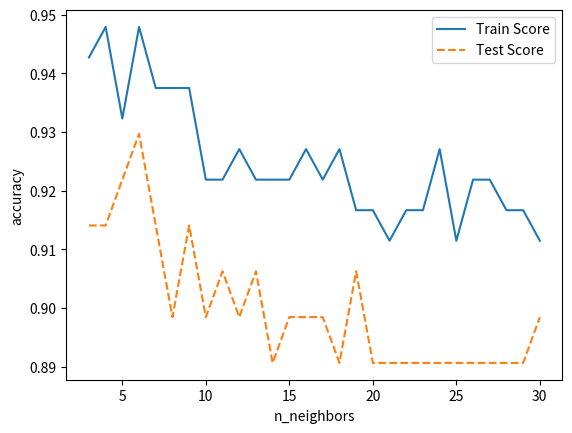

In [21]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

## n_neighbors에 따른 성능을 시각화하였습니다. test 데이터의 성능은 n_neighbors가 6일때 가장 높기에 6을 선정해주었습니다.

In [24]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]*2
para_weights=(["uniform"])*28+(["distance"]*28)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [25]:
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]= train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.943,0.914
1,4,uniform,0.948,0.914
2,5,uniform,0.932,0.922
3,6,uniform,0.948,0.930
4,7,uniform,0.938,0.914
5,8,uniform,0.938,0.898
6,9,uniform,0.938,0.914
7,10,uniform,0.922,0.898
8,11,uniform,0.922,0.906
9,12,uniform,0.927,0.898


In [26]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.942708     0.914062  0.914062
4                   1.0  0.947917     0.898438  0.914062
5                   1.0  0.932292     0.921875  0.921875
6                   1.0  0.947917     0.906250  0.929688
7                   1.0  0.937500     0.914062  0.914062
8                   1.0  0.937500     0.906250  0.898438
9                   1.0  0.937500     0.906250  0.914062
10                  1.0  0.921875     0.906250  0.898438
11                  1.0  0.921875     0.906250  0.906250
12                  1.0  0.927083     0.914062  0.898438
13                  1.0  0.921875     0.921875  0.906250
14                  1.0  0.921875     0.921875  0.890625
15                  1.0  0.921875     0.914062  0.898438
16                  1.0  0.927083     0.914062  0.898438
17                  1.0  0.921875     0.906250  0.898438
18                  1.0  0.927083     0.914062  0.890625
19                  1.0  0.916667     0.914062  0.906250
20                  1.0  0.916667     0.914062  0.890625
21                  1.0  0.911458     0.914062  0.890625
22                  1.0  0.916667     0.914062  0.890625
23                  1.0  0.916667     0.906250  0.890625
24                  1.0  0.927083     0.906250  0.890625
25                  1.0  0.911458     0.898438  0.890625
26                  1.0  0.921875     0.898438  0.890625
27                  1.0  0.921875     0.898438  0.890625
28                  1.0  0.916667     0.906250  0.890625
29                  1.0  0.916667     0.906250  0.890625
30                  1.0  0.911458     0.906250  0.898438

In [27]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.942708,0.914062,0.914062
4,1.0,0.947917,0.898438,0.914062
5,1.0,0.932292,0.921875,0.921875
6,1.0,0.947917,0.906250,0.929688
7,1.0,0.937500,0.914062,0.914062


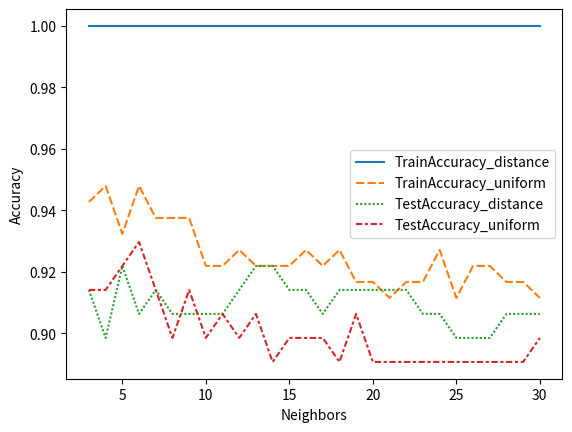

In [28]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

## distance와 uniform에 대해서 각각 n_neighbors를 1~10까지 설정하고 돌려보았을 때, n_neighbors 6에 uniform일때가 train , test 성능이 가장 높아 결정해주었습니다.

In [29]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]*2
para_metric=["euclidean"]*28+["manhattan"]*28

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [30]:
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]= train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,euclidean,0.943,0.914
1,4,euclidean,0.948,0.914
2,5,euclidean,0.932,0.922
3,6,euclidean,0.948,0.930
4,7,euclidean,0.938,0.914
5,8,euclidean,0.938,0.898
6,9,euclidean,0.938,0.914
7,10,euclidean,0.922,0.898
8,11,euclidean,0.922,0.906
9,12,euclidean,0.927,0.898


In [31]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
3              0.942708  0.942708     0.914062  0.906250
4              0.947917  0.937500     0.914062  0.937500
5              0.932292  0.932292     0.921875  0.914062
6              0.947917  0.947917     0.929688  0.921875
7              0.937500  0.937500     0.914062  0.921875
8              0.937500  0.927083     0.898438  0.929688
9              0.937500  0.942708     0.914062  0.914062
10             0.921875  0.932292     0.898438  0.906250
11             0.921875  0.932292     0.906250  0.898438
12             0.927083  0.932292     0.898438  0.898438
13             0.921875  0.932292     0.906250  0.898438
14             0.921875  0.921875     0.890625  0.898438
15             0.921875  0.927083     0.898438  0.898438
16             0.927083  0.927083     0.898438  0.890625
17             0.921875  0.916667     0.898438  0.906250
18             0.927083  0.921875     0.890625  0.906250
19             0.916667  0.911458     0.906250  0.906250
20             0.916667  0.921875     0.890625  0.898438
21             0.911458  0.911458     0.890625  0.906250
22             0.916667  0.921875     0.890625  0.890625
23             0.916667  0.911458     0.890625  0.898438
24             0.927083  0.916667     0.890625  0.898438
25             0.911458  0.916667     0.890625  0.898438
26             0.921875  0.921875     0.890625  0.898438
27             0.921875  0.921875     0.890625  0.898438
28             0.916667  0.911458     0.890625  0.898438
29             0.916667  0.916667     0.890625  0.898438
30             0.911458  0.911458     0.898438  0.898438

In [32]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
3,0.942708,0.942708,0.914062,0.906250
4,0.947917,0.937500,0.914062,0.937500
5,0.932292,0.932292,0.921875,0.914062
6,0.947917,0.947917,0.929688,0.921875
7,0.937500,0.937500,0.914062,0.921875


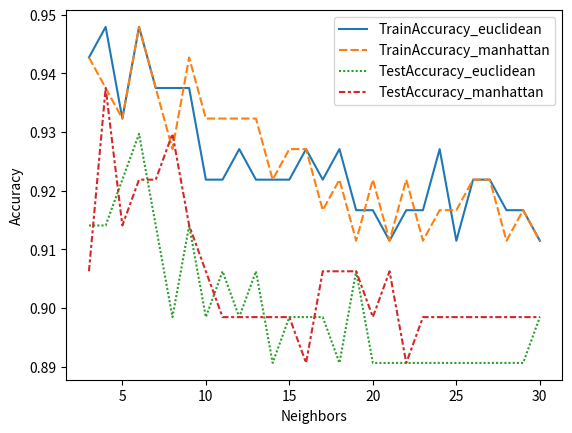

In [33]:
sns.lineplot(data=df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

## 유클리디안과 맨해튼 거리방식에 따른 정확도를 시각화하였습니다. n_neighbors가 6일 때 유클리디안 거리 방식을 사용할 때가 성능이 두 모델이 둘다 좋으므로 유클리디안을 결정하였습니다.

In [34]:
knn_model= KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
y_pred=knn_model.predict(df_test_x)


In [35]:
print("Train Accurary: {:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.948
Test Accuracy: 0.930
Test Confusion Matrix:
[[78  2]
 [ 7 41]]
              precision    recall  f1-score   support

           0      0.918     0.975     0.945        80
           1      0.953     0.854     0.901        48

    accuracy                          0.930       128
   macro avg      0.936     0.915     0.923       128
weighted avg      0.931     0.930     0.929       128



## 최종모델은 n=6 , uniform, 유클리디안으로 결정하였고, 정확도는 training과 test 모두 94.8, 93% 간 나왔습니다. 성능이 매우 좋으며 사용가능하다고 판단됩니다.